In [11]:
import sys
sys.path.insert(0, '/das/work/p17/p17983/')

In [12]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm

In [16]:
ploton = True


scan_name = "RuBpy3_monoscan_004"
#scan_name = "RuBpy3_monoscan_001"
#scan_name = "Ru_foil_monoscan_003"
# sf/alvra/data/p17983/raw/scan_data/Ru_foil_monoscan_001/
DIR = "/sf/alvra/data/p17983/raw/scan_data/" + scan_name + "/"
# DIR_json = "/das/work/p17/p17983/Example_data/res/scan_info/"
DIR_json = "/sf/alvra/data/p17983/res/scan_info/"

Set up the filters.  "numstds" is the number of standard deviations to take from the median.

In [17]:
numstds = 2
minIzero = 0.0025

json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])

print ("Processing",numFiles,"files")

DataFluo_pump_norm_total = np.empty(0)
DataFluo_unpump_norm_total = np.empty(0)
err_DataFluo_pump_total = np.empty(0)
err_DataFluo_unpump_total = np.empty(0)

IzeroFEL_pump_original_total = np.empty(0)
IzeroFEL_pump_total = np.empty(0)
IzeroFEL_unpump_original_total = np.empty(0)
IzeroFEL_unpump_total = np.empty(0)

DataFluo_pump_original_total = np.empty(0)
DataFluo_pump_total = np.empty(0)
DataFluo_unpump_original_total = np.empty(0)
DataFluo_unpump_total = np.empty(0)

Energy_eV = np.empty(0)
iZero = np.empty(0)

for i in range(0,numFiles):
#for i in range(0,1):
    filename = str(data['scan_files'][i][0])
    filename = DIR + os.path.basename(filename)
    exists = os.path.isfile(filename)
    if not exists:
        print("No such file")
    elif exists and i!=39: #Do we need this 39?
        print("step",i+1,"of",numFiles,": Processing %s" %(str(data['scan_files'][i][0])))
        
        (DataFluo_pump, DataFluo_unpump, IzeroFEL_pump, IzeroFEL_unpump, Energy, _, _, _) = \
            load_PumpProbe_events(filename, channel_energy)

        IzeroFEL_pump_original = IzeroFEL_pump.copy()
        IzeroFEL_unpump_original = IzeroFEL_unpump.copy()
        
        IzeroFEL_pump_original_total = np.append(IzeroFEL_pump_original_total, IzeroFEL_pump_original)
        IzeroFEL_unpump_original_total = np.append(IzeroFEL_unpump_original_total, IzeroFEL_unpump_original)
        
        DataFluo_pump_original_total = np.append(DataFluo_pump_original_total, DataFluo_pump)
        DataFluo_unpump_original_total = np.append(DataFluo_unpump_original_total, DataFluo_unpump)
        
        IzeroMedian = np.median(np.concatenate([IzeroFEL_pump, IzeroFEL_unpump]))
        IzeroSTD = np.std(np.concatenate([IzeroFEL_pump, IzeroFEL_unpump]))

        conditionPumpMax = IzeroFEL_pump < IzeroMedian+numstds*IzeroSTD
        conditionPumpMin = IzeroFEL_pump > IzeroMedian-numstds*IzeroSTD
        conditionPumpLow = IzeroFEL_pump > minIzero

        conditionUnPumpMax = IzeroFEL_unpump < IzeroMedian+numstds*IzeroSTD
        conditionUnPumpMin = IzeroFEL_unpump > IzeroMedian-numstds*IzeroSTD
        conditionUnPumpLow = IzeroFEL_unpump > minIzero

        condIzeroPump = conditionPumpMax & conditionPumpMin & conditionPumpLow
        condIzeroUnPump = conditionUnPumpMax & conditionUnPumpMin & conditionUnPumpLow
        
        IzeroFEL_pump = IzeroFEL_pump[condIzeroPump]
        IzeroFEL_unpump = IzeroFEL_unpump[condIzeroUnPump]
        
        IzeroFEL_pump_total = np.append(IzeroFEL_pump_total, IzeroFEL_pump)
        IzeroFEL_unpump_total = np.append(IzeroFEL_unpump_total, IzeroFEL_unpump)
        
        DataFluo_pump = DataFluo_pump[condIzeroPump]
        DataFluo_unpump = DataFluo_unpump[condIzeroUnPump]
        
        print(DataFluo_pump.shape)
        
        DataFluo_pump_total = np.append(DataFluo_pump_total, DataFluo_pump)
        DataFluo_unpump_total = np.append(DataFluo_unpump_total, DataFluo_unpump)
        
        DataFluo_pump_norm = DataFluo_pump/IzeroFEL_pump
        DataFluo_unpump_norm = DataFluo_unpump/IzeroFEL_unpump
        
        DataFluo_pump_norm_total = np.append(DataFluo_pump_norm_total, DataFluo_pump_norm.mean())
        DataFluo_unpump_norm_total = np.append(DataFluo_unpump_norm_total, DataFluo_unpump_norm.mean())
        err_DataFluo_pump_total = np.append(err_DataFluo_pump_total, DataFluo_pump_norm.std()/np.sqrt(DataFluo_pump_norm.size))
        err_DataFluo_unpump_total = np.append(err_DataFluo_unpump_total, DataFluo_unpump_norm.std()/np.sqrt(DataFluo_unpump_norm.size))
        
        Energy = [x for x in Energy if (np.abs(x) > 0)]
        Energy_eV = np.append(Energy_eV, np.mean(Energy))
        iZero = np.append(iZero, np.mean(IzeroFEL_pump_total))
        
        

/sf/alvra/data/p17983/res/scan_info/RuBpy3_monoscan_004_scan_info.json
Processing 36 files
step 1 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0000.BSREAD.h5
(904,)
step 2 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0001.BSREAD.h5
(917,)
step 3 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0002.BSREAD.h5
(910,)
step 4 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0003.BSREAD.h5
(896,)
step 5 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0004.BSREAD.h5
(906,)
step 6 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0005.BSREAD.h5
(925,)
step 7 of 36 : Processing /sf/alvra/data/p17983/raw/scan_data/RuBpy3_monoscan_004/RuBpy3_monoscan_004_step0006.BSREAD.h5
(917,)
step 8 of 36 

Plot some diagnostics

The original number of pumped and unpumped shots is:
(36000,) (36000,)
The filtered number of pumped and unpumped shots is:
(33365,) (33285,)


<IPython.core.display.Javascript object>


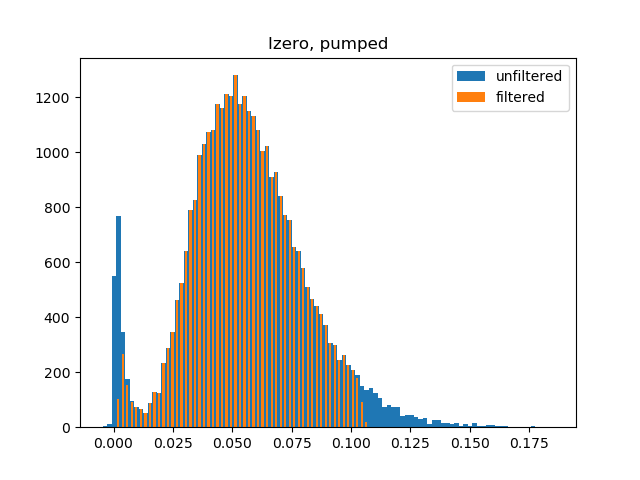

<IPython.core.display.Javascript object>


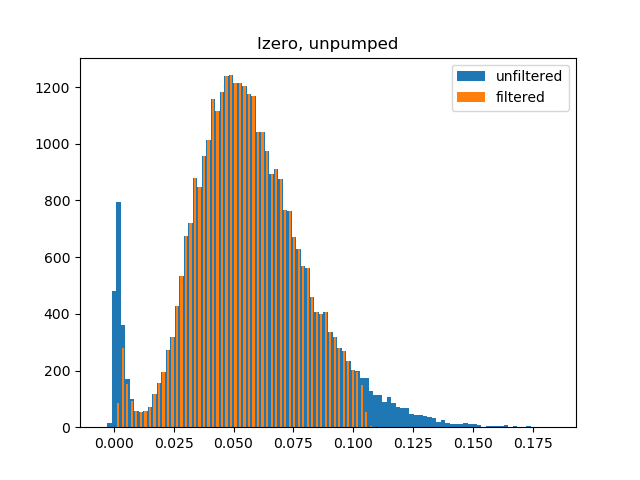

In [18]:
print("The original number of pumped and unpumped shots is:")
print(IzeroFEL_pump_original_total.shape, IzeroFEL_unpump_original_total.shape)
print("The filtered number of pumped and unpumped shots is:")
print(IzeroFEL_pump_total.shape, IzeroFEL_unpump_total.shape)

plt.figure()
_, bins, _ = plt.hist(IzeroFEL_pump_original_total, 100, label = 'unfiltered')
_ = plt.hist(IzeroFEL_pump_total, bins, rwidth = .5, label = 'filtered')
plt.title('Izero, pumped')
plt.legend()

plt.figure()
_, bins, _ = plt.hist(IzeroFEL_unpump_original_total, 100, label = 'unfiltered')
_ = plt.hist(IzeroFEL_unpump_total, bins, rwidth = .5, label = 'filtered')
plt.title('Izero, unpumped')
plt.legend()

<IPython.core.display.Javascript object>


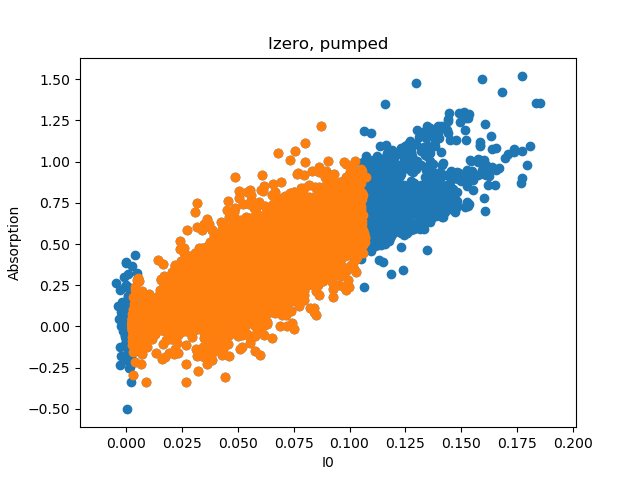

Text(0, 0.5, 'Absorption')

In [19]:
plt.figure()
plt.scatter(IzeroFEL_pump_original_total, DataFluo_pump_original_total)
plt.scatter(IzeroFEL_pump_total, DataFluo_pump_total)
plt.title('Izero, pumped')
plt.xlabel('I0')
plt.ylabel('Absorption')

<IPython.core.display.Javascript object>


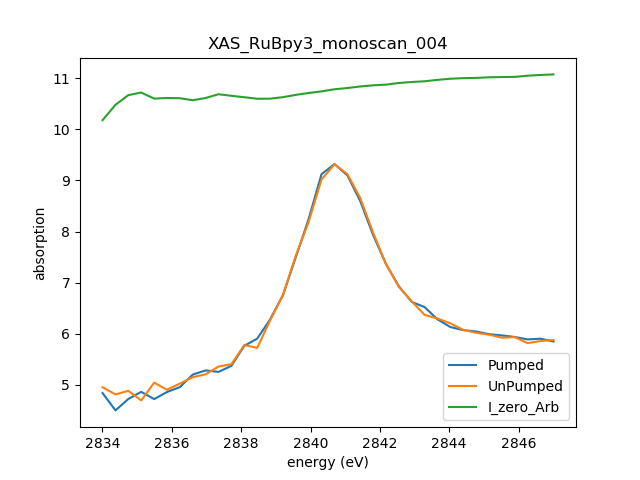

<IPython.core.display.Javascript object>


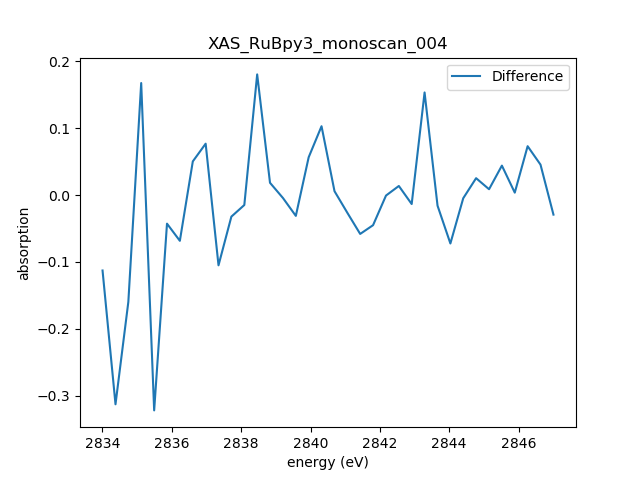

In [24]:
diff = DataFluo_pump_norm_total - DataFluo_unpump_norm_total

plt.figure()
plt.plot(np.array(Energy_eV), DataFluo_pump_norm_total,label='Pumped')
plt.plot(np.array(Energy_eV), DataFluo_unpump_norm_total,label='UnPumped')
plt.plot(np.array(Energy_eV), np.array(iZero)*200,label="I_zero_Arb")
plt.xlabel('energy (eV)')
plt.ylabel('absorption')
plt.title('XAS_'+ scan_name)
plt.legend()

plt.figure()
plt.plot(np.array(Energy_eV), diff, label='Difference')
plt.xlabel('energy (eV)')
plt.ylabel('absorption')
plt.title('XAS_' + scan_name)
plt.legend()

In [8]:
print(np.array(Energy_eV))

print(DataFluo_pump_norm_total)
DataFluo_pump_norm_total

[2830.99586331 2831.42863538 2831.85204978 2832.2795721  2832.70414294
 2833.12719175 2833.55517275 2833.97923437 2834.402742   2834.8303648
 2835.25365665 2835.67850411 2836.10432462 2836.52854053 2836.95294222
 2837.3793714  2837.802977   2838.23063975 2838.65367243 2839.07830909
 2839.50261908 2839.92953866 2840.35255027 2840.77938743 2841.203718
 2841.62913012 2842.05319083 2842.48013081 2842.90438719 2843.32839162
 2843.75542273 2844.18065178 2844.60452531 2845.0284573  2845.4559931
 2845.8799046 ]
[ 16.58442994  20.16704806  21.65721324  23.46142626  25.74774877
  28.48243979  32.36016086  35.25231436  40.47974543  46.21645319
  46.63241208  60.38472605  70.99496091  84.30946328 101.81181461
 122.85619879 138.39022045 170.13804765 186.49702151 194.83407478
 195.87843733 191.66588784 181.79680415 170.97213245 153.52791919
 152.1568829  144.67654102 138.59527865 132.74975997 127.9008603
 122.28798661 120.24291782 117.06496084 114.15395642 111.54849195
 109.47622405]


array([ 16.58442994,  20.16704806,  21.65721324,  23.46142626,
        25.74774877,  28.48243979,  32.36016086,  35.25231436,
        40.47974543,  46.21645319,  46.63241208,  60.38472605,
        70.99496091,  84.30946328, 101.81181461, 122.85619879,
       138.39022045, 170.13804765, 186.49702151, 194.83407478,
       195.87843733, 191.66588784, 181.79680415, 170.97213245,
       153.52791919, 152.1568829 , 144.67654102, 138.59527865,
       132.74975997, 127.9008603 , 122.28798661, 120.24291782,
       117.06496084, 114.15395642, 111.54849195, 109.47622405])